# BEST MODEL
Paste parameters and workflow of best model here

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('bmh')

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error

In [6]:
df_sj = pd.read_pickle('./datasets/all_sj.pkl')
df_iq = pd.read_pickle('./datasets/all_iq.pkl')
# read in pickled features
total_cases = pd.read_csv('./datasets/dengue_labels_train.csv')
cases_sj = total_cases[total_cases['city'] == 'sj']['total_cases']
cases_iq = total_cases[total_cases['city'] == 'iq']['total_cases']
# create month variable
df_sj['month'] = df_sj.index.month
df_iq['month'] = df_iq.index.month
# create mean ndvi
df_sj['ndvi_mean'] = (df_sj['ndvi_ne'] + df_sj['ndvi_nw'] + df_sj['ndvi_se'] + df_sj['ndvi_sw']) / 4.0
df_iq['ndvi_mean'] = (df_iq['ndvi_ne'] + df_iq['ndvi_nw'] + df_iq['ndvi_se'] + df_iq['ndvi_sw']) / 4.0

In [7]:
# get monthly trend of whole test df
lr_sj_month = LinearRegression()
X_months = pd.get_dummies(df_sj['month'], prefix='month')[:936]
Xtest_months = pd.get_dummies(df_sj['month'], prefix='month')[936:]
y = cases_sj.values

lr_sj_month.fit(X_months, y)
lr_sj_predictions = lr_sj_month.predict(X_months)
monthly_trend = pd.Series(lr_sj_predictions).rolling(3, min_periods=1).mean()
sj_residuals_all = y - monthly_trend  #actual is reduced by the values taken


# create test df of rolling weather stats
# rolling means df
# selecting features
Xtrain_means1 = df_sj['station_avg_temp_c'].rolling(window = 52).mean()[60:936]
Xtrain_means2 = df_sj['ndvi_se'].rolling(window = 25).mean()[60:936]


# combine all dfs
# check and include to features
Xtrain = pd.concat([Xtrain_means1, Xtrain_means2], axis = 1)
ytrain = sj_residuals_all[60:]


# create test df on rolling weather stats
# rolling means df
Xtest_means1 = df_sj['station_avg_temp_c'].rolling(window = 52).mean()[936:]
Xtest_means2 = df_sj['ndvi_se'].rolling(window = 25).mean()[936:]

# combine all dfs
Xtest_weather = pd.concat([Xtest_means1, Xtest_means2], axis = 1)

# fit on model
lr_sj_resid = LinearRegression()
lr_sj_resid.fit(Xtrain, ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [8]:
lr_sj_monthly_predictions = lr_sj_month.predict(Xtest_months)  # model trained x_months and cases_sj
sj_monthly_preds = pd.Series(lr_sj_monthly_predictions).rolling(3, min_periods=1).mean()
sj_resid_preds = lr_sj_resid.predict(Xtest_weather)
sj_cases_pred = pd.Series(sj_resid_preds + sj_monthly_preds).rolling(1, min_periods=1).mean()
sj_cases_pred = sj_cases_pred.apply(lambda x: 1 if x < 1 else int(x))

25.909186369263544


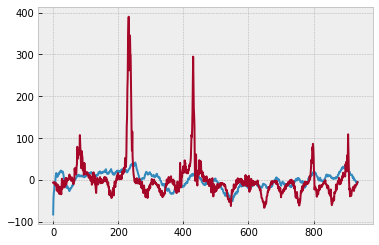

In [29]:
# Xtest_means1_for_train_data = df_sj['station_avg_temp_c'].rolling(window = 52, min_periods=1).mean()[:936]
# Xtest_means2_for_train_data = df_sj['ndvi_se'].rolling(window = 25, min_periods=1).mean()[:936]
# Xtest_weather = pd.concat([Xtest_means1_for_train_data, Xtest_means2_for_train_data], axis = 1)
# residual_predictions_for_train_data = lr_sj_resid.predict(Xtest_weather)

# plt.plot(residual_predictions_for_train_data)
# plt.plot(sj_residuals_all)

# print(mean_absolute_error(sj_residuals_all, residual_predictions_for_train_data))

# sj_residuals_linear = sj_residuals_all

In [9]:
from sklearn.ensemble import RandomForestRegressor
rf_monthly_sj = RandomForestRegressor(n_estimators=1000, max_features='auto',
                                 max_depth=10, min_samples_leaf=0.005,
                                 criterion='mae', min_weight_fraction_leaf=0.1
                                , warm_start=True)

X_months = pd.get_dummies(df_sj['month'], prefix='month')[:936]
Xtest_months = pd.get_dummies(df_sj['month'], prefix='month')[936:]
y = cases_sj.values

rf_monthly_sj.fit(X_months,y)

rf_sj_predictions = rf_monthly_sj.predict(X_months)
monthly_trend = pd.Series(rf_sj_predictions).rolling(3, min_periods=1).mean()
sj_residuals_all = y - monthly_trend  #actual is reduced by the values taken

# create test df of rolling weather stats
# rolling means df
# selecting features
Xtrain_means1 = df_sj['station_avg_temp_c'].rolling(window = 53).mean()[60:936]
Xtrain_means2 = df_sj['precipitation_amt_mm'].rolling(window = 53).mean()[60:936]
Xtrain_means3 = df_sj['ndvi_se'].rolling(window = 25).mean()[60:936]

# combine all dfs
# check and include to features
Xtrain = pd.concat([Xtrain_means1, Xtrain_means2, Xtrain_means3], axis = 1)
ytrain = sj_residuals_all[60:]


# create test df on rolling weather stats
# rolling means df
Xtest_means1 = df_sj['station_avg_temp_c'].rolling(window = 53).mean()[936:]
Xtest_means2 = df_sj['precipitation_amt_mm'].rolling(window = 53).mean()[936:]
Xtest_means3 = df_sj['ndvi_se'].rolling(window = 25).mean()[936:]

# combine all dfs
Xtest_weather = pd.concat([Xtest_means1, Xtest_means2, Xtest_means3], axis = 1)

# fit on model
rf_sj_resid = RandomForestRegressor(n_estimators=1000, max_features='auto',
                                 max_depth=10, min_samples_leaf=0.005,
                                 criterion='mae', min_weight_fraction_leaf=0.1
                                , warm_start=True)
# train the model using selected features
rf_sj_resid.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=0.005, min_samples_split=2,
           min_weight_fraction_leaf=0.1, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=True)

In [7]:
# Xtest_means1_for_train_data = df_sj['station_avg_temp_c'].rolling(window = 53, min_periods=1).mean()[:936]
# Xtest_means2 = df_sj['precipitation_amt_mm'].rolling(window = 53, min_periods=1).mean()[:936]
# Xtest_means3 = df_sj['ndvi_se'].rolling(window = 25, min_periods=1).mean()[:936]

# Xtest_weather = pd.concat([Xtest_means1_for_train_data, Xtest_means2, Xtest_means3], axis = 1)
# residual_predictions_for_train_data = rf_sj_resid.predict(Xtest_weather)

# residual_predictions_for_train_data_plot = pd.Series(residual_predictions_for_train_data).rolling(1, min_periods=1).mean()
# plt.plot(residual_predictions_for_train_data_plot)
# # plt.plot(sj_residuals_all)
# plt.plot(sj_residuals_linear)
# print(mean_absolute_error(sj_residuals_all, residual_predictions_for_train_data_plot))
# print(mean_absolute_error(sj_residuals_linear, residual_predictions_for_train_data_plot))

In [10]:
# make predictions on monthly data and residual data
rf_sj_monthly_predictions = lr_sj_month.predict(Xtest_months)  # model trained x_months and cases_sj
sj_monthly_preds = pd.Series(rf_sj_monthly_predictions).rolling(3, min_periods=1).mean()
sj_resid_preds = rf_sj_resid.predict(Xtest_weather)
sj_cases_pred = pd.Series(sj_resid_preds + sj_monthly_preds).rolling(1, min_periods=1).mean()
sj_cases_pred = sj_cases_pred.apply(lambda x: 1 if x < 1 else int(x))

In [5]:
rf_monthly_iq = RandomForestRegressor(n_estimators=1000, max_features='auto',
                                 max_depth=10, min_samples_leaf=0.005,
                                 criterion='mae', min_weight_fraction_leaf=0.1
                                , warm_start=True)

X_months = pd.get_dummies(df_iq['month'], prefix='month')[:520]
Xtest_months = pd.get_dummies(df_iq['month'], prefix='month')[520:]
y = cases_iq.values

rf_monthly_iq.fit(X_months, y)
monthly_trend = pd.Series(rf_monthly_iq.predict(X_months)).rolling(8, min_periods=1).mean()
iq_residuals_all = y - monthly_trend

# rolling means df
Xtrain_means1 = df_iq['station_avg_temp_c'].rolling(window = 53).mean()[60:520]
Xtrain_means2 = df_iq['precipitation_amt_mm'].rolling(window = 5).mean()[60:520]
# combine all dfs
Xtrain = pd.concat([Xtrain_means1, Xtrain_means2], axis = 1)
ytrain = iq_residuals_all[60:]


# create test df on rolling weather stats
# rolling means df
Xtest_means1 = df_iq['station_avg_temp_c'].rolling(window = 53).mean()[520:]
Xtest_means2 = df_iq['precipitation_amt_mm'].rolling(window = 5).mean()[520:]
# combine all dfs
Xtest_weather = pd.concat([Xtest_means1, Xtest_means2], axis = 1)

# fit on model
rf_iq_resid = RandomForestRegressor(n_estimators=1000, max_features='auto',
                                 max_depth=10, min_samples_leaf=0.005,
                                 criterion='mae', min_weight_fraction_leaf=0.1
                                , warm_start=True)
rf_iq_resid.fit(Xtrain, ytrain)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=10,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=0.005, min_samples_split=2,
           min_weight_fraction_leaf=0.1, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=True)

In [6]:
# make predictions on monthly data and residual data
iq_monthly_preds = pd.Series(rf_monthly_iq.predict(Xtest_months)).rolling(8, min_periods=1).mean()
iq_resid_preds = rf_iq_resid.predict(Xtest_weather)
iq_cases_pred = pd.Series(iq_monthly_preds + iq_resid_preds)
iq_cases_pred = iq_cases_pred.apply(lambda x: 0 if x < 1 else int(x))

In [12]:
total_preds_random_forest = list(sj_cases_pred) + list(iq_cases_pred)


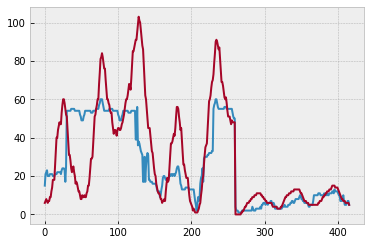

In [91]:
plt.plot(total_preds_random_forest)
plt.plot(total_preds_linear_regression)


In [84]:
### Make CSV

In [13]:
# submission
submission_format = pd.read_csv('./datasets/submission_format.csv')

In [15]:
submission_format['total_cases'] = total_preds_random_forest
submission_format['total_cases'] = submission_format['total_cases'].apply(lambda x: int(x))

In [16]:
# Save to CSV, use current date
submission_format.to_csv('submissions/dengue_submission_20_07_18v2.csv', index=False)

In [17]:
submission_format.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,11
1,sj,2008,19,15
2,sj,2008,20,16
3,sj,2008,21,15
4,sj,2008,22,13


### Submitted MAEs!!!!
* monthly trend and mean `station_avg_temp_c` with window = 52 was 20.7764
* monthly trend and mean `station_avg_temp_c` with window = 52 and std window = 8 was 20.7981
* monthly trend and mean `station_avg_temp_c` and `precipitation_amt_mm` with window = 52 and std window = 8 was 24.1274
* monthly trend and sj used mean `station_avg_temp_c` with window = 55 and iq used 'ndvi_nw' with window = 68 was 23.5697
* monthly trend and sj used mean `station_avg_temp_c` with window = 55 and `ndvi_se` with window = 10 and iq used 'ndvi_nw' with window = 68 was 21.337
* Next steps: use other rolling features (and std? and shifted? and exponentially weighted mean?)